In [5]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import spacy

In [6]:
df=pd.read_csv("../data/newcorp.csv")

In [7]:
df

,article_id,title,article_text,summary_1_text,summary_2_text,summary_3_text,summary_4_text,summary_5_text,thesis_1_text,thesis_2_text,...,thesis_5_text,lead,body,conclusion,article_segments,summary_1_segments,summary_2_segments,summary_3_segments,summary_4_segments,summary_5_segments
0,1,"2015: Beyond Obama, new Congress, we need a re...","2015: Beyond Obama, new Congress, we need a re...",the stock market is at record highs|A Pew Rese...,"In the film, ""Girl Interrupted,"" Winona Ryder ...",A Pew Research Center study confirms one trend...,our traditional institutions and self-confiden...,"The ""typical"" American family is no longer typ...","In the film, ""Girl Interrupted,"" Winona Ryder ...","In the film, ""Girl Interrupted,"" Winona Ryder ...",...,"The ""typical"" American family is no longer typ...","['In the film, ""Girl Interrupted,"" Winona Ryde...","['the stock market is at record highs', 'our t...","['we don\' t learn from history because""our st...","{""paragraphs"":[ [ {""number"":1, ""text"":""2...","[{'number': 12, 'text': 'the stock market is a...","[{'number': 2, 'text': 'In the film, ""Girl Int...","[{'number': 16, 'text': 'A Pew Research Center...","[{'number': 14, 'text': 'our traditional insti...","[{'number': 18, 'text': 'The ""typical"" America..."
1,2,2015: Will America continue its slow march tow...,2015: Will America continue its slow march tow...,"A British author, residing in the United State...","A British author, residing in the United State...",the federal government cannot interfere with o...,the federal government cannot interfere with o...,which declares that we are free to make person...,"A British author, residing in the United State...","A British author, residing in the United State...",...,He went on to opine that the government today ...,"['A British author, residing in the United Sta...",['which declares that we are free to make pers...,['Both parties support perpetual war and perpe...,"{""paragraphs"":[ [ {""number"":1, ""text"":""2...","[{'number': 2, 'text': 'A British author, resi...","[{'number': 2, 'text': 'A British author, resi...","[{'number': 19, 'text': 'the federal governmen...","[{'number': 19, 'text': 'the federal governmen...","[{'number': 15, 'text': 'which declares that w..."
2,3,2015: Will new Congress get serious about Puti...,2015: Will new Congress get serious about Puti...,Moscow has long opposed U.S missile defense i...,This adds to the list of over 40 serious incid...,President Obama has so far remained unwilling ...,This adds to the list of over 40 serious incid...,This adds to the list of over 40 serious incid...,If the U.S does configure systems to protect ...,"""The bear never asks permission,"" remarked Vla...",...,In early December there was another near miss ...,"['""The bear never asks permission,"" remarked V...",['President Obama has so far remained unwillin...,"['Between the failure of the infamous ""Iran de...","{""paragraphs"":[ [ {""number"":1, ""text"":""2...","[{'number': 23, 'text': 'Moscow has long oppos...","[{'number': 10, 'text': 'This adds to the list...","[{'number': 12, 'text': 'President Obama has s...","[{'number': 10, 'text': 'This adds to the list...","[{'number': 10, 'text': 'This adds to the list..."
3,4,? 300 for a job reference is the latest outrag...,? 300 for a job reference is the latest outrag...,A reference is immediately invalid once money ...,"First, they've been sent the message that they...",His market is ambitious but terrified young pe...,"although the ""junior associates"" programme was...",Repeated references to these elusive skills ra...,this idea catches on|references as a measure o...,Getting a job with worthless education and mon...,...,A reference is immediately invalid once money ...,['there were an award for scummiest business p...,"['although the ""junior associates"" programme w...",['no one pays? 300 to be damned with faint pra...,"{""paragraphs"":[ [ {""number"":1, ""text"":""?...","[{'number': 66, 'text': '

In [8]:
text_list=[]
label_list=[]

In [9]:
def datasetmaker(x):
    x=json.loads(x)
    for i in range(0,len(x["paragraphs"])):
        for j in range(0,len(x["paragraphs"][i])):
            text_list.append(x["paragraphs"][i][j]["text"])
            label_list.append(x["paragraphs"][i][j]["label"])

In [10]:
df["article_segments"].apply(lambda x:datasetmaker(x))

0      None
1      None
2      None
3      None
4      None
       ... 
261    None
262    None
263    None
264    None
265    None
Name: article_segments, Length: 266, dtype: object

In [11]:
len(text_list)

28772

In [12]:
len(label_list)

28772

In [13]:
df_main={"text":text_list,"label":label_list}

In [14]:
df_main=pd.DataFrame(df_main)

In [15]:
df_main.head()

,text,label
0,"2015: Beyond Obama, new Congress, we need a re...",title
1,"In the film, ""Girl Interrupted,"" Winona Ryder ...",anecdote
2,.,no-unit
3,The year is 1967,anecdote
4,and,no-unit


In [16]:
len(text_list)

28772

In [17]:
df_main["label"].value_counts()

no-unit          15193
assumption        9049
anecdote          2430
testimony         1064
statistics         381
title              266
common-ground      232
other              157
Name: label, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

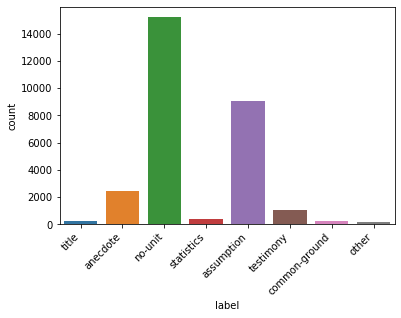

In [18]:
sns.countplot(data=df_main,x="label")
plt.xticks(rotation=45, ha='right')

In [19]:
df_main[df_main["label"]=="no-unit"]["text"]

2                    .
4                  and
6                    .
8                    .
10       As 2014 ends,
             ...      
28763                -
28765                .
28767                .
28769                .
28771                .
Name: text, Length: 15193, dtype: object

In [20]:
len_no_unit=df_main[df_main["label"]=="no-unit"]["text"].apply(lambda x:len(x.split(" ")))

In [21]:
len_no_unit.value_counts().head()

1    14530
2      327
3       94
4       63
6       28
Name: text, dtype: int64

In [29]:
df_main=df_main.loc[(df_main["label"]!="no-unit") | ((df_main["label"]=="no-unit") & (df_main["text"].map(len) > 1)) ]
df_main

,text,label
0,"2015: Beyond Obama, new Congress, we need a re...",title
1,"In the film, ""Girl Interrupted,"" Winona Ryder ...",anecdote
3,The year is 1967,anecdote
4,and,no-unit
5,the country is in turmoil over Vietnam and civ...,anecdote
...,...,...
28762,We need to normalise talking about the realiti...,assumption
28764,it is the only way we can move forward together,assumption
28766,We need a radical change from top to bottom,assumption
28768,Therapy isn't just about lying on a couch whil...,assumption


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

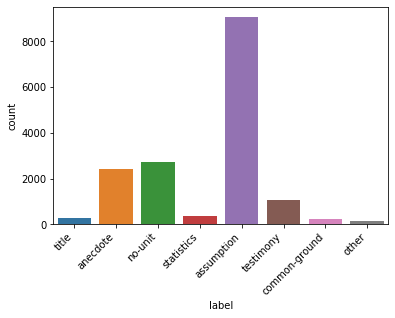

In [30]:
sns.countplot(data=df_main,x="label")
plt.xticks(rotation=45, ha='right')

#### Feel that a lot of no unit labels consist of just a single punctuation
#### Discarding these should be considered 
#### Makes the dataset very imbalanced 

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_main["label"]=le.fit_transform(df_main["label"])

In [32]:
X=df_main["text"]
y=df_main["label"]

In [33]:
y.head()

0    7
1    0
3    0
4    3
5    0
Name: label, dtype: int32

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42,stratify=y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [35]:
Train=pd.concat([X_train,y_train],axis=1)

In [36]:
Test=pd.concat([X_test,y_test],axis=1)

In [37]:
Train.to_csv("train.csv",index=False)
Test.to_csv("test.csv",index=False)

In [38]:
from datasets import load_dataset

In [39]:
dataset = load_dataset('csv', data_files={'train': ['train.csv'],'test': 'test.csv'})

Using custom data configuration default-51dff07da0b928cd


100%|██████████| 2/2 [00:00<00:00, 105.26it/s]


Dataset csv downloaded and prepared to C:\Users\DearUser\.cache\huggingface\datasets\csv\default-51dff07da0b928cd\0.0.0\6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


100%|██████████| 2/2 [00:00<00:00, 142.89it/s]


In [40]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [41]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13032
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3259
    })
})

In [42]:
def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length',truncation=True)

In [43]:
tokenized_datasets = dataset.map(tokenize_data, batched=True)

100%|██████████| 4/4 [00:02<00:00,  1.89ba/s]


In [44]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(5000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [52]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 13032
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3259
    })
})

In [53]:
tokenized_datasets.set_format("torch")

In [54]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(500))

In [55]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=4)

In [56]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=8)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at C:\Users\DearUser/.cache\huggingface\transformers\23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6

In [57]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

In [58]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [59]:
print(device)

cpu


In [60]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [61]:
from datasets import load_metric

In [62]:
model.train()

for epoch in range(3):
    for batch in train_dataloader:
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs = model(**batch)
      loss = outputs.loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

metric = load_metric("accuracy")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])


TypeError: new(): invalid data type 'numpy.str_'

In [ ]:
metric.compute()